# Fancy Indexing
Fancy indexing is conceptually simple: it means passing an array of indices to access multiple array elements at once. For example, consider the following array:

In [6]:
import numpy as np
rand = np.random.RandomState(7)

x = rand.randint(100, size=10)
print(x)

[47 68 25 67 83 23 92 57 14 23]


In [7]:
[x[1], x[3], x[5]]

[68, 67, 23]

In [8]:
ind = [1, 3, 5]
x[ind]

array([68, 67, 23])

In [9]:
ind = np.array([[1, 3],
                [5, 7]])
x[ind]

array([[68, 67],
       [23, 57]])

### Fancy indexing also works in multiple dimensions

In [14]:
X = np.arange(16).reshape((4, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [20]:
row = np.array([0, 1, 0])
col = np.array([1, 0, 1])
X[row, col]

array([1, 4, 1])

In [23]:
X[row[:, np.newaxis], col]

array([[1, 0, 1],
       [5, 4, 5],
       [1, 0, 1]])

In [22]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [1, 0, 1],
       [0, 0, 0]])

### Combined Indexing

In [25]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [26]:
X[2, [2, 0, 1]]

array([10,  8,  9])

In [27]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9],
       [14, 12, 13]])

In [28]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[0, 2],
       [4, 6],
       [0, 2]])

 ### Selecting random points

In [29]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

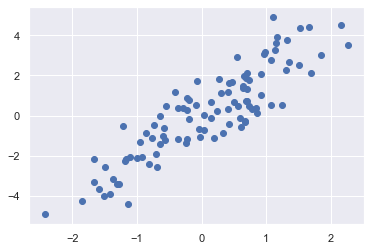

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling

plt.scatter(X[:, 0], X[:, 1]);

In [31]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([ 5, 77, 31, 23, 16, 56, 40, 41, 92, 67, 36, 76, 48, 49, 71, 46, 70,
       99, 97, 32])

In [32]:
selection = X[indices]  # fancy indexing here
selection.shape

(20, 2)

### Binning data

In [33]:
np.random.seed(7)
x = np.random.randn(10)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i, 1)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).
  


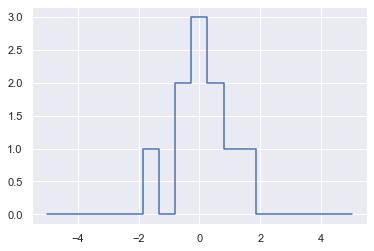

In [34]:
# plot the results
plt.plot(bins, counts, linestyle='steps');

In [35]:
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
45.7 µs ± 10.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Custom routine:
9.26 µs ± 768 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
